# 9 Clustering 

In [1]:
import pandas as pd
import numpy as np
import sklearn
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

In [2]:
X = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)   
X.head()

,lat,lon,alt
37171,9.962756,57.577387,27.476864
322496,9.748761,56.936618,39.690242
424114,9.189720,56.697273,9.957343
198526,9.891963,57.026230,41.835966
53791,9.654846,57.129256,2.847309


In [3]:
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

In [4]:
df = pd.DataFrame(np.zeros((10, 46)), np.arange(1, 11, 1), np.arange(.05, .51, .01))
df

,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,...,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

for min_samples in np.arange(1, 11, 1):
    for eps in np.arange(.05, .51, .01):
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
        df.loc[min_samples, eps] = sklearn.metrics.silhouette_score(XX[['lat','lon', 'alt']], XX.cluster)

C:\Users\samvt\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


<IPython.core.display.Javascript object>


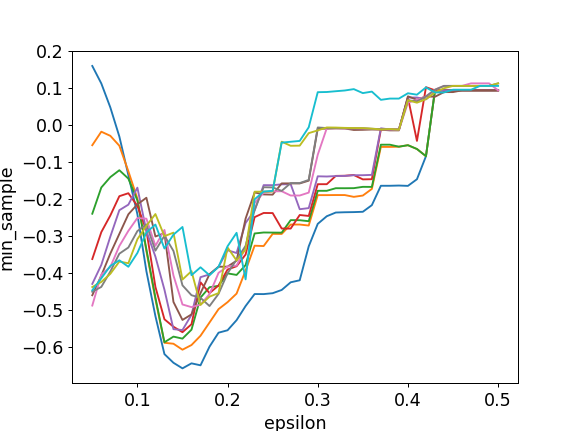

Text(0, 0.5, 'min_sample')

In [6]:
plt.figure()
for i in np.arange(1, 11, 1):
    plt.plot(df.loc[i,:])
        
plt.xlabel('epsilon')
plt.ylabel('min_sample')

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots. 

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot
- Plots of the clustered data

In [7]:
tweets = pd.read_csv('../data/snow_tweets.csv', index_col=0)
tweets.time = pd.to_datetime(tweets.time, infer_datetime_format=True)

In [8]:
tweets['hour_of_day'] = (tweets.time.dt.hour)
tweets = tweets.drop(['time'], axis=1)

In [9]:
tweets.head()

,lat,lon,hour_of_day
0,39.284713,-76.620452,22
1,38.776676,-77.176680,22
2,38.898603,-77.014398,22
3,39.424571,-76.572547,22
4,38.898603,-77.014398,22


In [10]:
tweets.dtypes

lat            float64
lon            float64
hour_of_day      int64
dtype: object

In [11]:
len(tweets)

209312

In [12]:
trunc = tweets[(tweets.lon<-76) & (tweets.lon>-78) & (tweets.lat>38.4)&(tweets.lat<39.6)]

In [13]:
len(trunc)

161719

In [14]:
trunc.hour_of_day.unique()

array([22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21], dtype=int64)

In [15]:
trunc.head()

,lat,lon,hour_of_day
0,39.284713,-76.620452,22
1,38.776676,-77.176680,22
2,38.898603,-77.014398,22
3,39.424571,-76.572547,22
4,38.898603,-77.014398,22


In [16]:
# K-means with N clusters
N = 7 # using 7 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state=1)
km.fit(trunc)

KMeans(n_clusters=7, random_state=1)

In [17]:
set(km.labels_) # seven labels for the seven clusters

{0, 1, 2, 3, 4, 5, 6}

In [18]:
trunc['cluster'] = km.predict(trunc) # stores predictions in a column of dataframe

C:\Users\samvt\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
trunc.head()

,lat,lon,hour_of_day,cluster
0,39.284713,-76.620452,22,4
1,38.776676,-77.176680,22,4
2,38.898603,-77.014398,22,4
3,39.424571,-76.572547,22,4
4,38.898603,-77.014398,22,4


In [20]:
trunc.cluster.unique()

array([4, 3, 0, 6, 2, 5, 1])

In [21]:
trunc.cluster.value_counts()

0    40797
3    25216
5    22197
1    20663
4    19524
6    18527
2    14795
Name: cluster, dtype: int64

<IPython.core.display.Javascript object>


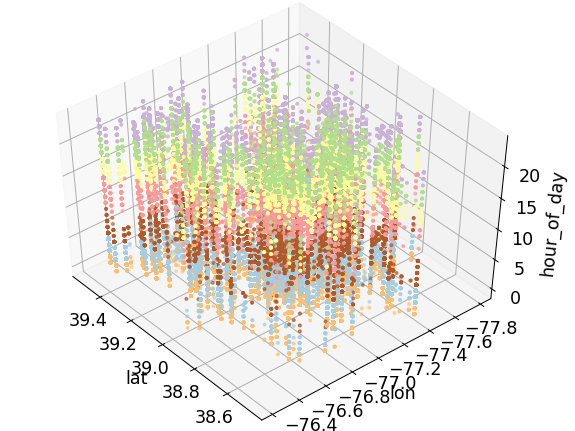

In [22]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(trunc['lat'], trunc['lon'], trunc['hour_of_day'], c=trunc.cluster, s=5, cmap="Paired")

ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('hour_of_day')
plt.show()

<IPython.core.display.Javascript object>


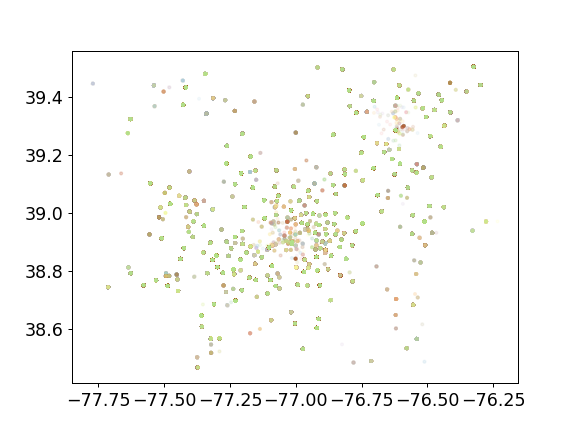

In [23]:
fig = plt.figure()
plt.scatter(trunc.lon, trunc.lat, c=trunc.cluster, alpha=.1, s=5, cmap="Paired")

## Note
You may use any for both parts 1 and 2, I only recommend using the data I used in the Lesson for part 1. I've included several new datasets in the `data/` folder, such as `beers.csv`, `snow_tweets.csv`, `data/USCensus1990.data.txt.gz`. You do not need to unzip or ungzip any data files. Pandas can open these files on its own.